In [1]:
import pickle as pkl
import pk_plot_library as pplib

pplib.imports()

In [2]:
ds = pkl.load(open('/Users/cosinga/code/hcolor/fig_md_analysis/bias_results.pkl', 'rb'))

ds.tickArgs(direction = 'in', labelsize = 14)
ds.legendArgs(frameon = False, loc = 'upper right', fontsize = 14, slc = (-1, -1))

ds.rowLabelArgs(pos = [0.05, 0.05], fontsize = 16, ha = 'left', va = 'bottom')
ds.colLabelArgs(pos = [0.5, 0.95], fontsize = 16, ha = 'center', va = 'top')

ds.axisArgs(xscale = 'log', yscale = 'log', xlim = [0.04, 20])
ds.axisLabelArgs('both', fontsize = 16)

ds.displayAs('simname', ['tng100', 'tng300', 'tng100-2'], ['TNG100-1', 'TNG300-1', 'TNG100-2'])
ds.setCmap('simname', ['darkgreen', 'gray', 'limegreen'], ['tng100', 'tng300', 'tng100-2'])

ds.displayAs('HI_fieldname', ['vn', 'hiptl', 'hisubhalo'], ['All Particles', 'Particles in Galaxies', 'Galaxy Centers'])
ds.displayAs('space', ['real', 'redshift', 'rsd'], ['Real Space', 'Redshift Space', 'Redshift Space\nDistortions'])
ds.displayAs('color', ['blue', 'red', 'resolved'], ['Blue Galaxies', 'Red Galaxies', 'All Galaxies'])

ds.setXLabel(pplib.wnum())

# Investigations

## HI Auto Powers

The row values for space: ['real', 'redshift']
The column values for HI_fieldname: ['vn', 'hiptl', 'hisubhalo']


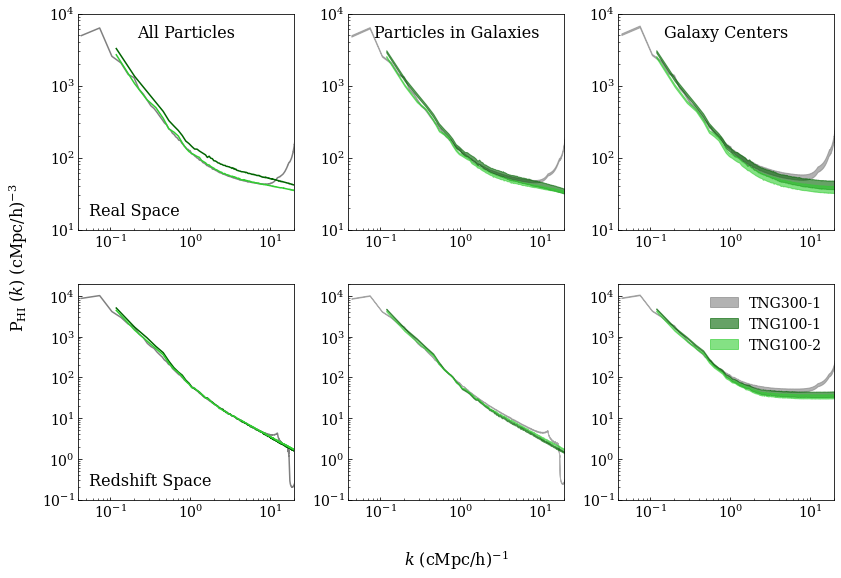

In [3]:
ip = {'is_auto':True, 'HI_fieldname':['vn', 'hiptl', 'hisubhalo'], 'simname':['tng100', 'tng300', 'tng100-2'],
     'snapshot':99, 'space':['real', 'redshift'], 'grid_resolution':800, 'path':['fiducial', 'low-2']}
fg = ds.figrid('simname', 'space', 'HI_fieldname', ip)
fg.autoFill(alpha = 0.6)
fg.setYLabel(pplib.pklab('HI'))
fg.axisArgs(ylim = (10, 1e4), slc = 'real')
fg.axisArgs(ylim = (.1, 2e4), slc = 'redshift')
fg.plot()

* <span style="color:red"> Not sure why the tng300-1 auto powers have that knee at the largest scale, that's pretty concerning </span>
* When looking strictly at the HI within galaxies, the match between the simulations is extremely good. TNG100-1 differs from the other two simulations though when using all particles - probably due to the filaments being more sensitive to the mass resolution definition? In any case, the difference is still small.
* The fact that TNG100-2 and TNG300-1 overlap a lot is a good sign that what we're looking at is mostly due to mass resolution.

## Galaxy Auto Powers

The row values for space: ['real', 'redshift']
The column values for color: ['blue', 'red', 'resolved']


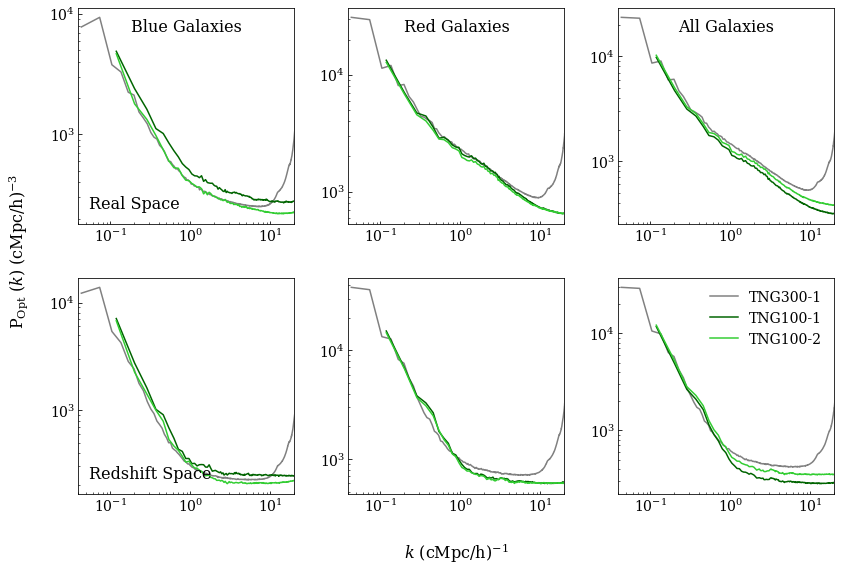

In [4]:
ip = {'is_auto':True, 'fieldname':'galaxy', 'simname':['tng100', 'tng300', 'tng100-2'],
     'snapshot':99, 'space':['real', 'redshift'], 'grid_resolution':800, 'path':['fiducial', 'low-2'],
     'gal_res':'diemer', 'color_cut':['0.60', 'None'], 'color':['blue', 'red', 'resolved']}
fg = ds.figrid('simname', 'space', 'color', ip)
fg.setYLabel(pplib.pklab("Opt"))
fg.plot()


* Again, there's the weird knee at the largest scales of the box in all of the auto power spectra
* Similar otherwise to the HI comparison between the simulations with blue galaxies
* Red galaxies match extremely well across the board
* The all galaxies is probably affected due to the changing proportions of blue vs red

## Cross-Powers

The row values for space: ['real', 'redshift']
The column values for color: ['blue', 'red', 'resolved']


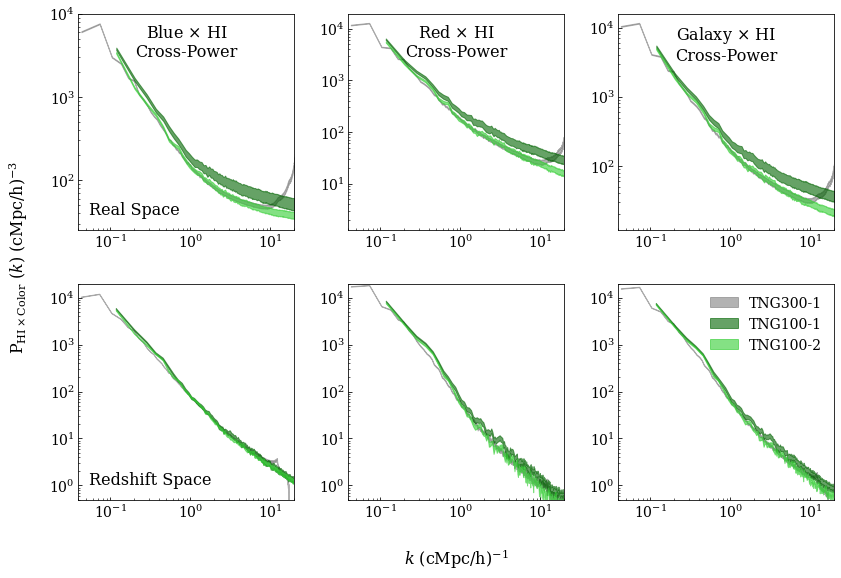

In [5]:
ds.displayAs('color', ['blue', 'red', 'resolved'], 
             ['Blue $\\times$ HI\nCross-Power', 'Red $\\times$ HI\nCross-Power', 'Galaxy $\\times$ HI\nCross-Power'])
ip = {'is_auto':False, 'HI_fieldname':['vn','hiptl'], 
      'axis':0, 'grid_resolution':800, 
      'color_cut':['0.60', 'None'], 'gal_res':'diemer',
      'gal_species':'stmass', 'simname':['tng100', 'tng100-2', 'tng300'], 
      'path':['fiducial', 'low-2'], 'mas':'CICW', 'post_process':'no key found',
     'color':['blue', 'red', 'resolved'], 'space':['real', 'redshift'],
     'snapshot':99}
fg = ds.figrid('simname', 'space', 'color', ip)
fg.autoFill(alpha = 0.6)
fg.setYLabel(pplib.pklab('HI', 'Color'))
fg.axisArgs(ylim = (.5, 2e4), slc = 'redshift')
fg.plot()

# Paper Figures

The row values for snapshot: [99]
The column values for color: ['blue', 'red', 'resolved']


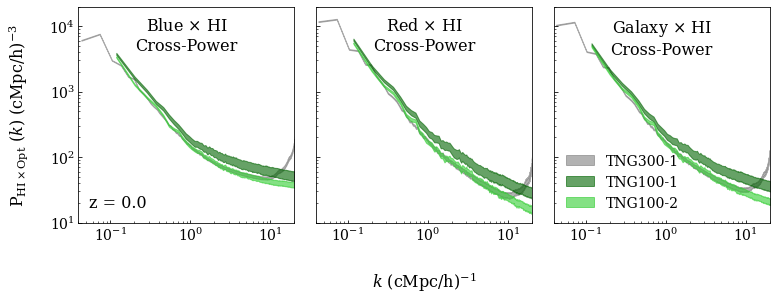

In [6]:
ip = {'is_auto':False, 'HI_fieldname':['vn','hiptl'], 
      'axis':0, 'grid_resolution':800, 
      'color_cut':['0.60', 'None'], 'gal_res':'diemer',
      'gal_species':'stmass', 'simname':['tng100', 'tng100-2', 'tng300'], 
      'path':['fiducial', 'low-2'], 'mas':'CICW', 'post_process':'no key found',
     'color':['blue', 'red', 'resolved'], 'space':'real',
     'snapshot':99}
fg = ds.figrid('simname', 'snapshot', 'color', ip)
fg.autoFill(alpha = 0.6)
fg.rowLabels(['z = 0.0'])
fg.gspecArgs(wspace = 0.1)
fg.axisArgs(ylim = (10, 2e4))
fg.setYLabel(pplib.pklab('HI', 'Opt'))
fg.setDefaultTicksParams()
fg.legendArgs(loc = 'lower left')
fg.plot()
fg.save('/Users/cosinga/code/hicolor_draft/figures/sim_volume.pdf', dpi = 150)
fg.save('sim_volume.png', dpi = 150)